In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from time import time
from sklearn.pipeline import Pipeline

In [2]:
data= "spam.csv"
df = pd.read_csv(data ,encoding='ISO-8859-1')

In [3]:
df.rename({'v1':'label','v2':'message'},axis=1,inplace=True)

In [4]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [5]:
df.isna().sum()

label      0
message    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.duplicated().sum()

403

In [8]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df=df.drop_duplicates()

In [10]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

C:\Users\SIBIJ\AppData\Local\Temp\ipykernel_19680\1903981523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['ham','spam'],y=[df['label'].value_counts()['ham'],df['label'].value_counts()['spam']],palette='rocket')


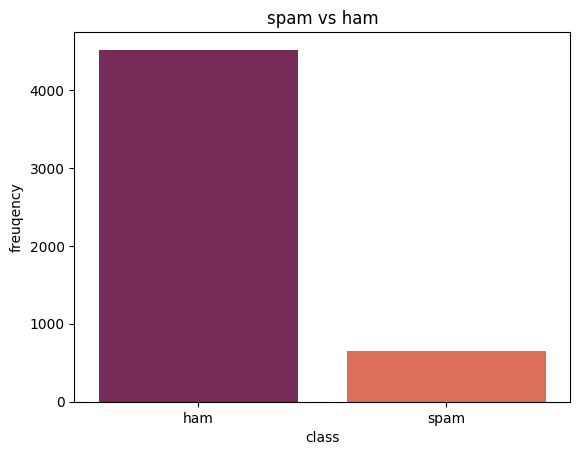

In [11]:
plt.title('spam vs ham')
plt.xlabel('class')
plt.ylabel('freuqency')
sns.barplot(x=['ham','spam'],y=[df['label'].value_counts()['ham'],df['label'].value_counts()['spam']],palette='rocket')
plt.show()


In [12]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [13]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
from tqdm import tqdm

In [15]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIBIJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIBIJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))

In [299]:
import re
def preprocess_message(message):
    message=re.sub(r'\W',' ',message)
    tokens=word_tokenize(message.lower())
    stemmed_words=[stemmer.stem(token) for token in tokens if token not in stop_words]
    return " ".join(stemmed_words)

In [18]:
df['message']=df['message'].apply(preprocess_message)

In [19]:
df

,label,message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though
...,...,...
5567,1,2nd time tri 2 contact u u å 750 pound prize 2...
5568,0,ì_ b go esplanad fr home
5569,0,piti mood suggest
5570,0,guy bitch act like interest buy someth els nex...


In [20]:
x=df['message']
y=df['label']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train

2228                                         exact intent
5529                                                  one
2149                           waaaat lololo ok next time
5058    free video camera phone half price line rental...
5051    tick tick tick could die loneli know pout stom...
                              ...                        
4740            mani happi return day wish happi birthday
474     nice line said broken heart plz cum 1 time inf...
3266                               ok come n pick u engin
4016    eek lot time especi sinc american pie like 8 m...
879     u secret admir look 2 make contact u find r re...
Name: message, Length: 4135, dtype: object

In [25]:
import joblib
pipeline_et = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', ExtraTreesClassifier())
])

# Train the model
pipeline_et.fit(x_train, y_train)

# Evaluate the model
y_pred = pipeline_et.predict(x_test)
print(classification_report(y_test, y_pred))
joblib.dump(pipeline_et,'et_model_pipe.pkl')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



['et_model_pipe.pkl']

In [26]:
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', BernoulliNB())
])

# Train the model
pipeline_nb.fit(x_train, y_train)

# Evaluate the model
y_pred = pipeline_nb.predict(x_test)
print(classification_report(y_test, y_pred))
joblib.dump(pipeline_nb,'be_model_pipe.pkl')

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



['be_model_pipe.pkl']

In [27]:
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [28]:
evl_models={'Logistic Regression':LogisticRegression(max_iter=2000),
          'Random Forest':RandomForestClassifier(),
          'Extra Tree': ExtraTreesClassifier(),
          'MultinomialNB': MultinomialNB(),
          'BernoulliNB':BernoulliNB(),
          }


In [29]:
import joblib

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
def evl_model(xtrain,ytrain,xtest,ytest):
    sns.set(rc={'figure.figsize':(18,6)})
    i=0
    for name,model in evl_models.items():
        fig,axs=plt.subplots(1,2)
        print('Model:'+name)
        print('_'*30)
        start=time()
        model.fit(xtrain,ytrain)
        y_pred=model.predict(xtest)
        end=time()
        #confusion matrix
        cm=confusion_matrix(ytest,y_pred,labels=model.classes_)
        cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
        cmd.plot(colorbar=False,ax=axs[i])
        axs[i].grid(False)
        #AUC-ROC curve
        y_proba=model.predict_proba(xtest)
        fpr,tpr,_=roc_curve(ytest,y_proba[:,1])
        roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr).plot(ax=axs[i+1])
        axs[i+1].plot([0,1],[1,0],color='g')
        plt.tight_layout()
        plt.show()
        print('Recall Score: {}\nPrecision: {}\nF1-Score: {}\nAccuracy Score: {}\nAUC Score: {}\nRunning Time: {} sec'.format(recall_score(ytest,y_pred),precision_score(ytest,y_pred),f1_score(ytest,y_pred),accuracy_score(ytest,y_pred),roc_auc_score(ytest,y_proba[:,1]),round((end-start),2)))
        print('*'*30)
        joblib.dump(model,name+'.pkl')
        
    

Model:Logistic Regression
______________________________


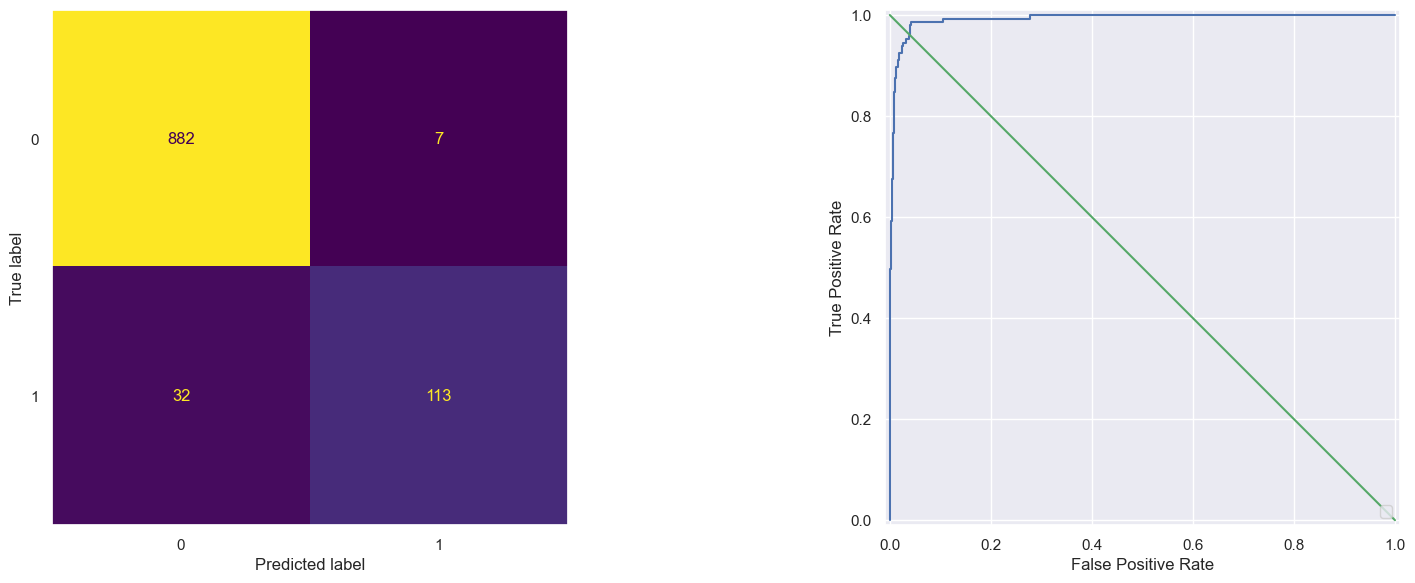

Recall Score: 0.7793103448275862
Precision: 0.9416666666666667
F1-Score: 0.8528301886792453
Accuracy Score: 0.9622823984526112
AUC Score: 0.9921570148559016
Running Time: 0.01 sec
******************************
Model:Random Forest
______________________________


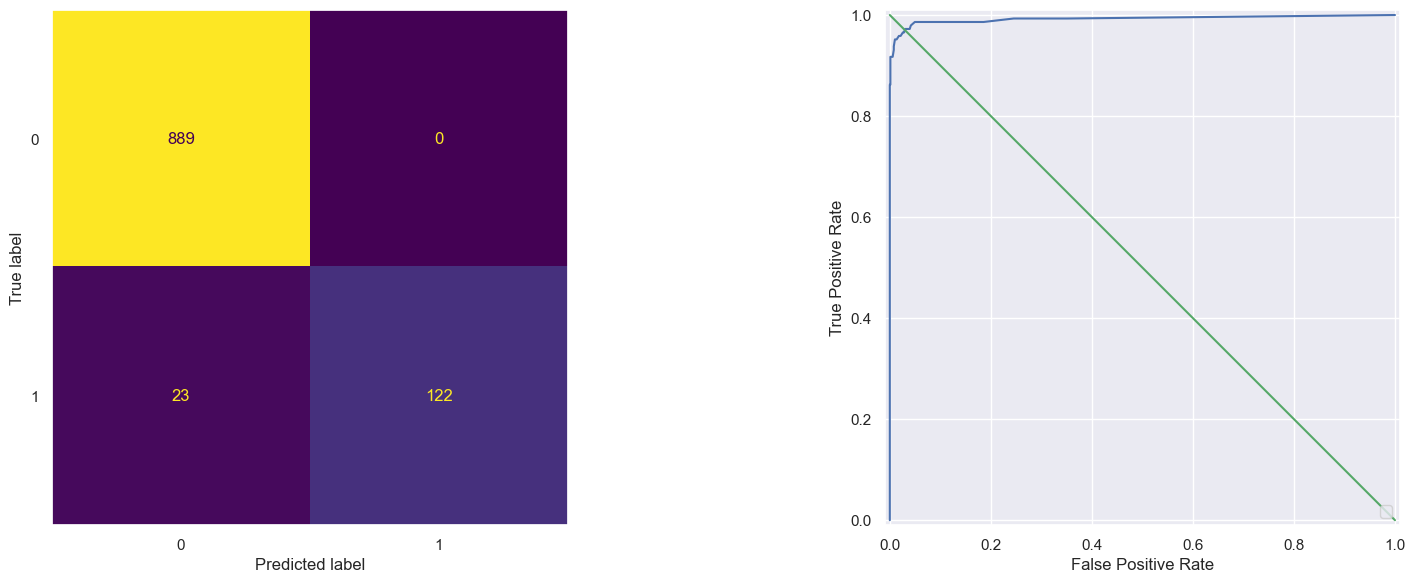

Recall Score: 0.8413793103448276
Precision: 1.0
F1-Score: 0.9138576779026217
Accuracy Score: 0.9777562862669246
AUC Score: 0.992455684418758
Running Time: 0.86 sec
******************************
Model:Extra Tree
______________________________


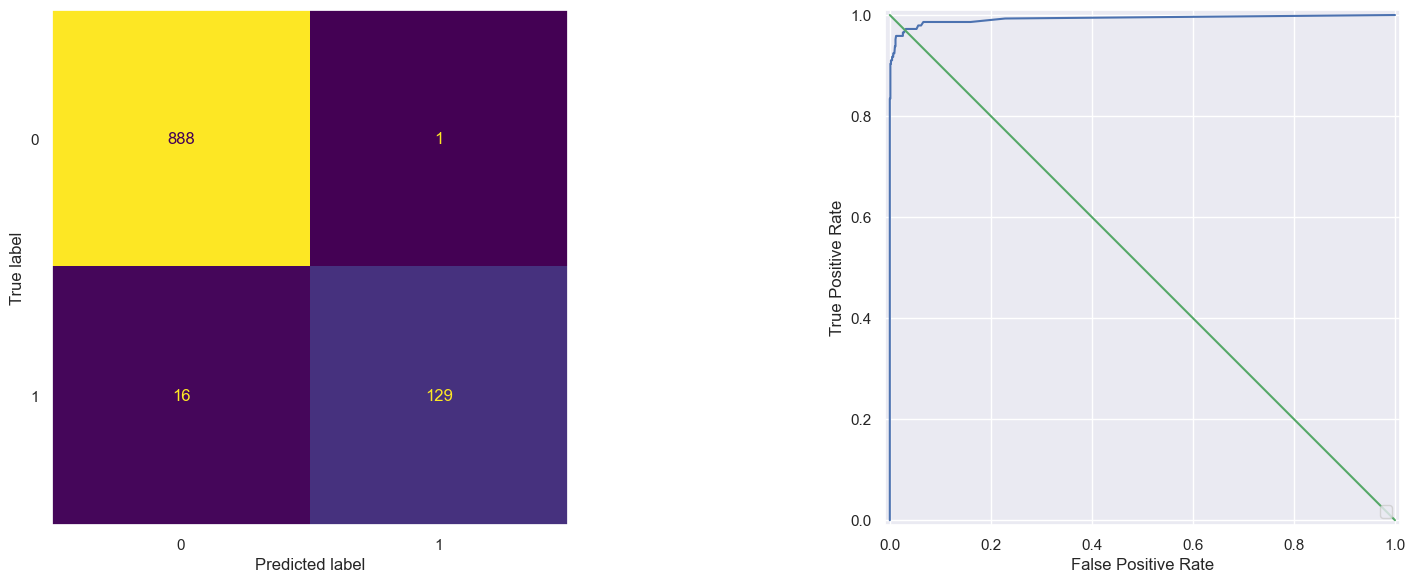

Recall Score: 0.8896551724137931
Precision: 0.9923076923076923
F1-Score: 0.9381818181818182
Accuracy Score: 0.9835589941972921
AUC Score: 0.9926845351227647
Running Time: 1.04 sec
******************************
Model:MultinomialNB
______________________________


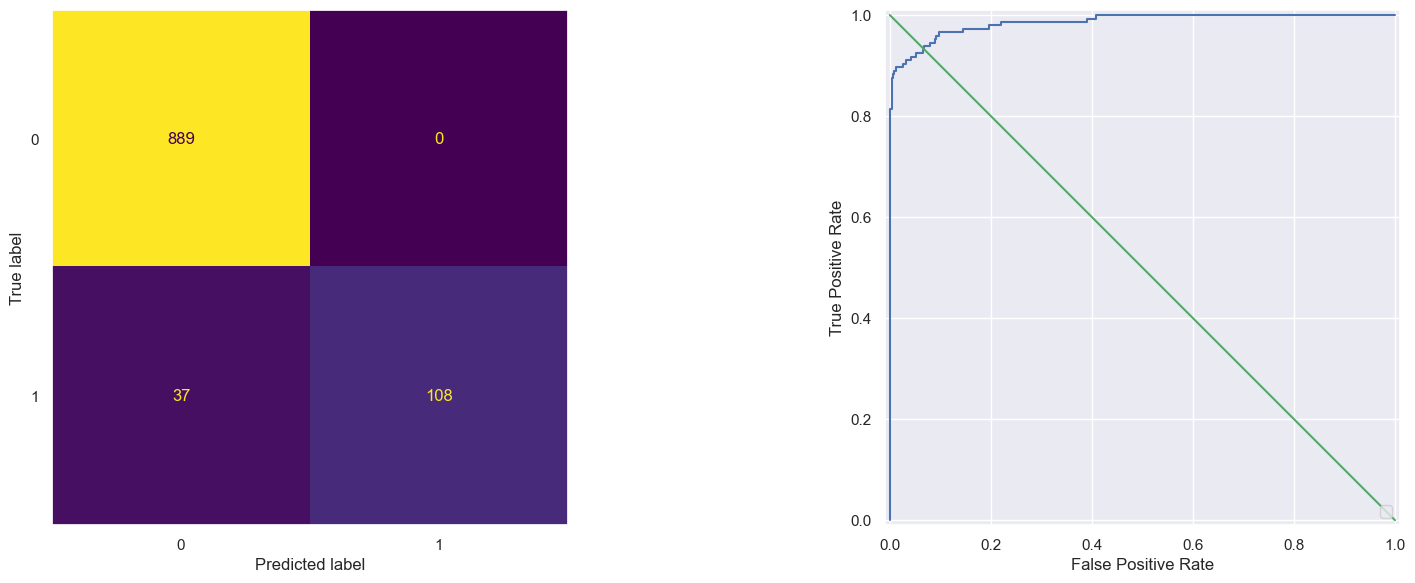

Recall Score: 0.7448275862068966
Precision: 1.0
F1-Score: 0.8537549407114624
Accuracy Score: 0.9642166344294004
AUC Score: 0.9856483456809279
Running Time: 0.0 sec
******************************
Model:BernoulliNB
______________________________


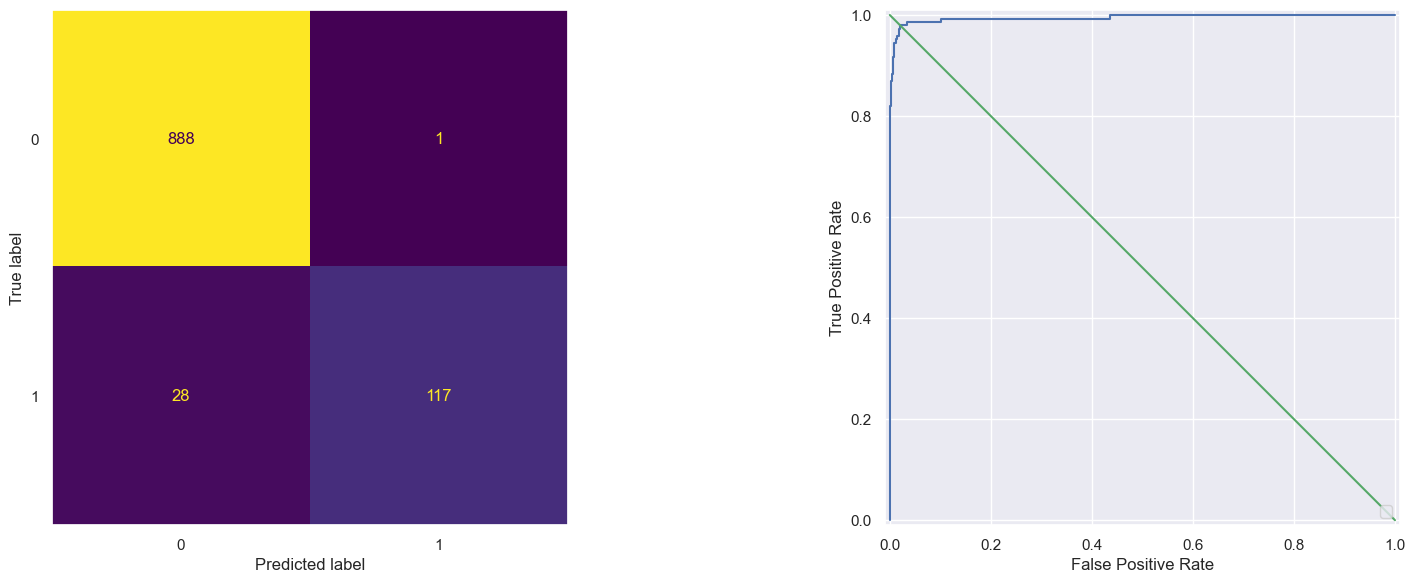

Recall Score: 0.8068965517241379
Precision: 0.9915254237288136
F1-Score: 0.8897338403041825
Accuracy Score: 0.971953578336557
AUC Score: 0.9948721927000505
Running Time: 0.0 sec
******************************
CPU times: total: 2.09 s
Wall time: 3.02 s


In [31]:
%%time
evl_model(x_train,y_train,x_test,y_test)

To determine the best SMS spam detection model, we need to consider multiple evaluation metrics:

1. **Recall Score**: Indicates how many actual spam messages were correctly identified.
2. **Precision Score**: Indicates how many identified spam messages were actually spam.
3. **F1 Score**: Harmonic mean of precision and recall, providing a single measure of the model's performance.
4. **Accuracy Score**: Overall correctness of the model.
5. **AUC Score**: Area under the ROC curve, indicating the model's ability to distinguish between classes.
6. **Running Time**: Time taken to train and test the model.

### Analysis:
- **Best Overall Performance**:
  - **Extra Tree Classifier** has the highest F1 Score (0.915) and a very high Accuracy (0.978) and Recall (0.855). However, it has a longer running time (1.05 sec).

- **Best in Precision and AUC**:
  - **Random Forest** has perfect Precision (1.0), high Recall (0.821), high F1 Score (0.902), high Accuracy (0.975), and very high AUC (0.993). It has a moderate running time (0.85 sec).

- **Best Running Time**:
  - **MultinomialNB** and **BernoulliNB** have the fastest running time (0.0 sec). BernoulliNB has better overall performance compared to MultinomialNB with higher Recall (0.814), F1 Score (0.894), Accuracy (0.973), and AUC (0.994).

### Conclusion:

Based on the balance of performance metrics and running time, **BernoulliNB** stands out as a strong candidate for the best SMS spam detection model in this case, especially considering its very fast running time and high overall performance metrics. However, if slightly longer running time is acceptable, **Extra Tree Classifier** provides the highest F1 Score and accuracy.

### Final Recommendation:

- **For Quick and Efficient Detection**: **BernoulliNB**.
- **For Highest Detection Performance**: **Extra Tree Classifier**.

In [300]:
message="Get a new credit card with a low interest rate! Click here to apply now!"

In [301]:

message=preprocess_message(message)

In [302]:
message

'get new credit card low interest rate click appli'

In [296]:
text=vectorizer.transform([message])

In [297]:
br_model=joblib.load('BernoulliNB.pkl')
pred=br_model.predict(text)
pred

array([0], dtype=int64)

In [286]:
et_model=joblib.load('Extra Tree.pkl')
et_pred=et_model.predict(text)
et_pred

array([1], dtype=int64)

In [287]:
log=joblib.load('Logistic Regression.pkl')
log_pred=log.predict(text)
log_pred

array([0], dtype=int64)

In [288]:
mt=joblib.load('MultinomialNB.pkl')
mt_pred=mt.predict(text)
mt_pred

array([0], dtype=int64)

In [289]:
rc=joblib.load('Random Forest.pkl')
rc_pred=rc.predict(text)
rc_pred

array([0], dtype=int64)

In [290]:
be=joblib.load('be_model_pipe.pkl')
be_pred=be.predict([message])
be_pred

array([0], dtype=int64)

In [291]:
et=joblib.load('et_model_pipe.pkl')
et_pred_pipe=et.predict([message])
et_pred_pipe

array([0], dtype=int64)

In [298]:
message

'get new credit card low interest rate click appli'

In [293]:


def preprocess_message(message):
    # Replace all non-word characters with spaces
    message = re.sub(r'\W', ' ', message)
    
    # Tokenize the message
    tokens = word_tokenize(message)
    
    # Stem and remove stopwords
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    
    return ' '.join(stemmed_tokens)


In [303]:
pipeline_et

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', ExtraTreesClassifier())])